<a href="https://colab.research.google.com/github/yamada-github-account/LearnBayesNN/blob/master/AnalyticBernoulli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt

import numpy as np

import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow_probability import distributions as tfd


%matplotlib inline

In [2]:
class Bernoulli:
    def __init__(self):
        self.a = 1
        self.b = 1

    def fit(self,data):
        data = tf.reshape(tf.convert_to_tensor(data,dtype=tf.int32),[-1])
        N = data.shape[0]
        positive = int(tf.math.count_nonzero(data))
        self.a += positive
        self.b += N - positive

    def plot_prob(self):
        beta = tfd.Beta(self.a,self.b)
        x = np.linspace(0,1,1000)
        y = beta.prob(x)
        plt.plot(x,y)
        plt.title(r"$p\left (\mu\|x\right)$ for Bernoulli$\left(x\|\mu\right)$")
        plt.show()

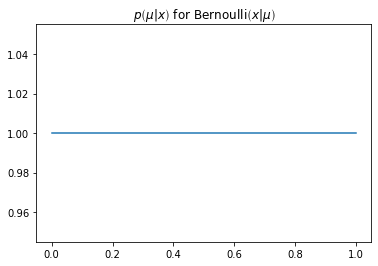

In [3]:
b = Bernoulli()

# 無情報事前分布をプロット
b.plot_prob()

In [4]:
# 推定対象の真の分布を作成
bern = tfd.Bernoulli(probs=0.75)

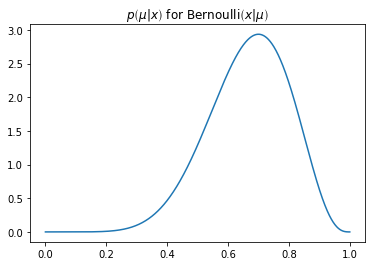

In [5]:
# 真の分布から10個のサンプルを生成し、ベイズ推論
b.fit(bern.sample(10))

# 事後分布をプロット
b.plot_prob()

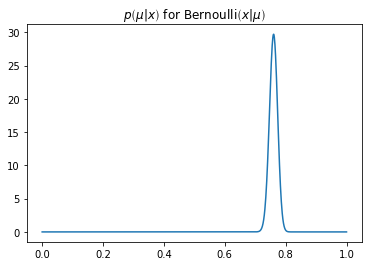

In [6]:
# 更に追加で、真の分布から1000個のサンプルを生成し、ベイズ推論
b.fit(bern.sample(1000))

# 事後分布をプロット
b.plot_prob()